Q2. Compare RNN training with and without dropout (for regularization). 
Train an RNN with different batch sizes and analyze performance. 
Fine-tune a pretrained RNN model on a custom dataset. 
Visualize hidden states over time for interpretability.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
input_size = 10
hidden_size = 20
output_size = 1
learning_rate = 0.01
dropout_rate = 0.3

In [57]:
Wx = np.random.randn(hidden_size, input_size) * 0.01
Wh = np.random.randn(hidden_size, hidden_size) * 0.01
Wy = np.random.randn(output_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

In [58]:
def forward(inputs, train=True):
    h = np.zeros((hidden_size, 1))
    last_hs = {-1: h}
    dropout_masks = {}
    outputs = []
    
    for t, x in enumerate(inputs):
        x = x.reshape(-1, 1)
        h = np.tanh(Wx @ x + Wh @ last_hs[t - 1] + bh)
        
        if train:
            dropout_mask = (np.random.rand(*h.shape) > dropout_rate) / (1 - dropout_rate)
            h *= dropout_mask
            dropout_masks[t] = dropout_mask

        y = Wy @ h + by
        outputs.append(y)
        last_hs[t] = h
    
    return outputs, last_hs

In [59]:
def train(inputs, targets):
    outputs, _ = forward(inputs, train=True)
    loss = sum(np.mean((out - target.reshape(-1, 1))**2) for out, target in zip(outputs, targets))
    return loss

In [60]:
def train_with_different_batch_sizes():
    batch_sizes = [16, 32, 64, 128]
    inputs = [np.random.randn(input_size) for _ in range(10)]
    targets = [np.random.randn(output_size) for _ in range(10)]
    
    for batch_size in batch_sizes:
        losses = []
        for epoch in range(50):
            batch_loss = 0
            for _ in range(batch_size):
                loss = train(inputs, targets)
                batch_loss += loss
            losses.append(batch_loss / batch_size)
        print(f"Batch size {batch_size}: Final loss = {losses[-1]:.4f}")

In [61]:
def fine_tune_rnn(new_data, new_targets, fine_tune_epochs=20):
    for epoch in range(fine_tune_epochs):
        loss = train(new_data, new_targets)
        if epoch % 5 == 0:
            print(f"Fine-tune Epoch {epoch}, Loss: {loss:.4f}")

In [62]:
def visualize_hidden_states():
    inputs = [np.random.randn(input_size) for _ in range(10)]
    _, hidden_states = forward(inputs, train=False)
    hidden_states_matrix = np.hstack([hidden_states[t] for t in range(len(inputs))])
    
    plt.figure(figsize=(10, 6))
    for i in range(hidden_states_matrix.shape[0]):
        plt.plot(hidden_states_matrix[i], label=f"Hidden Unit {i}")
    
    plt.title("Hidden States Over Time")
    plt.xlabel("Timestep")
    plt.ylabel("Activation Value")
    plt.legend()
    plt.show()

In [63]:
print("Training with different batch sizes:")
train_with_different_batch_sizes()

Training with different batch sizes:
Batch size 16: Final loss = 5.9019
Batch size 32: Final loss = 5.9015
Batch size 64: Final loss = 5.9016
Batch size 128: Final loss = 5.9014


In [64]:
print("\nFine-tuning pretrained RNN:")
new_data = [np.random.randn(input_size) for _ in range(10)]
new_targets = [np.random.randn(output_size) for _ in range(10)]
fine_tune_rnn(new_data, new_targets)


Fine-tuning pretrained RNN:
Fine-tune Epoch 0, Loss: 10.0384
Fine-tune Epoch 5, Loss: 10.0542
Fine-tune Epoch 10, Loss: 10.0495
Fine-tune Epoch 15, Loss: 10.0470



Visualizing hidden states:


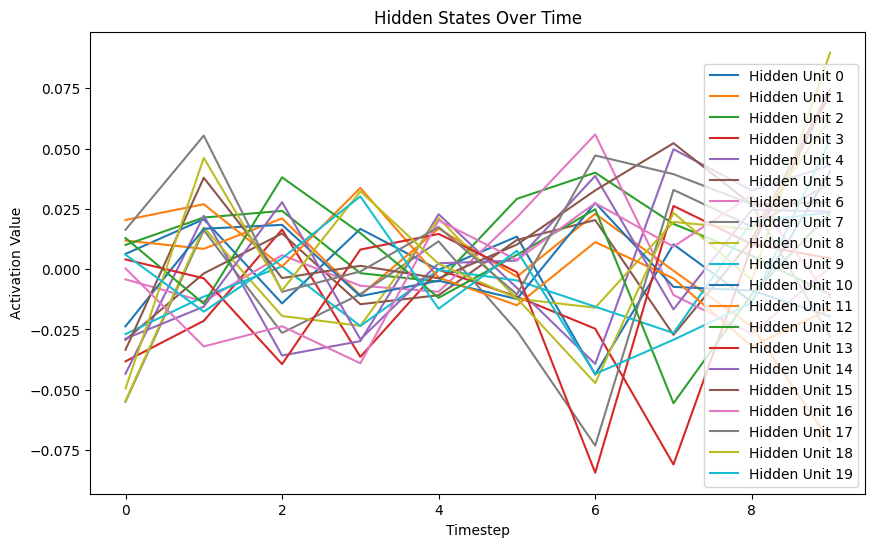

In [65]:
print("\nVisualizing hidden states:")
visualize_hidden_states()